# G$_0$W$_0$@PBE

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

# Use of LaTeX is optional
usetex = True

# Read JSON file into a Pandas DataFrame
g0w0_df = pd.read_json("df_g0w0.json", orient="split")

# Colors dictionary
colors_dict = {
    'None'  : 'black',
    'A'     : "tab:blue",
    'D'     : "tab:orange",
    'AA'    : "tab:red",
    'AD'    : "tab:green",
    'DD'    : "tab:purple",
    'AAD'   : "tab:brown",
    "ADD"   : "tab:pink",
    "AADD"  : "tab:olive",
    "AAADD" : "black",
}


# Extract data into appropriate Lists
x = [ i+1 for i in range(len(g0w0_df["energies_pbeh"])) for j in g0w0_df["energies_pbeh"][i]]
pbeh = [item for sublist in g0w0_df["energies_pbeh"].values for item in sublist]
g0w0 = [item for sublist in g0w0_df["energies_g0w0"].values for item in sublist]
colors = [colors_dict[item] for sublist in g0w0_df["labels"].values for item in sublist]
labels = g0w0_df["shortname"]

# Escape underscores in labels if usetex = True
if usetex: labels = [item.translate(str.maketrans({"_": r"\_"})) for item in labels]

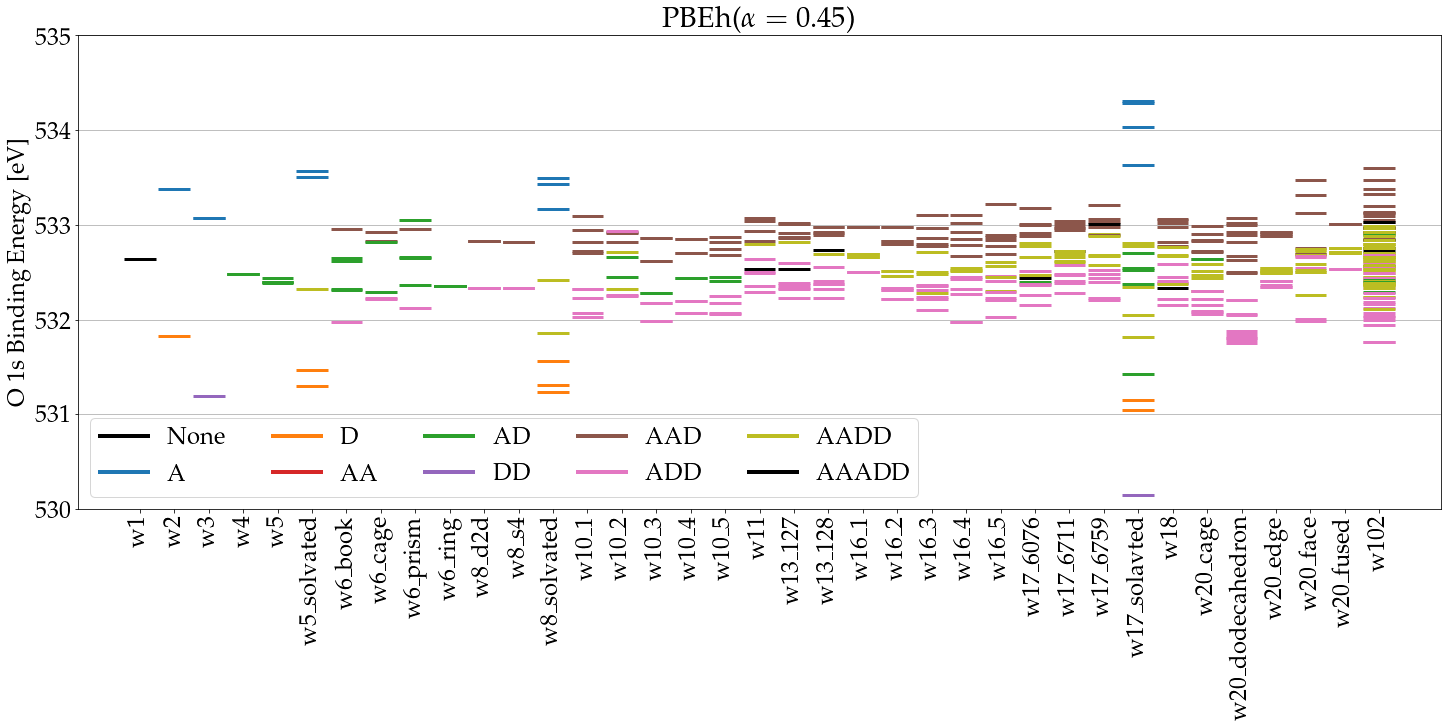

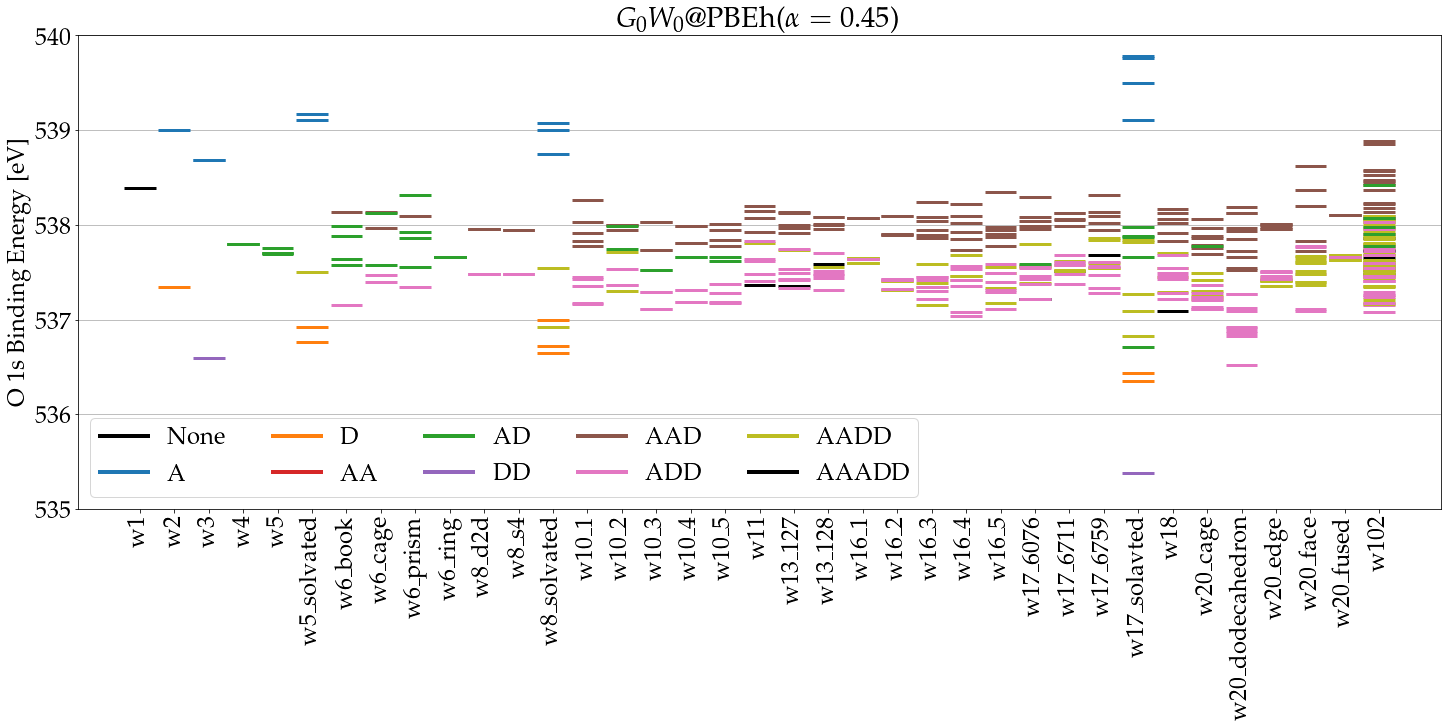

In [2]:
# Plots

plt.rcParams.update({
    "text.usetex": usetex,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    'font.size': 24
})

# Legends
lines = [Line2D([0], [0], color=colors_dict['None'], lw=4),
         Line2D([0], [0], color=colors_dict['A'], lw=4),
         Line2D([0], [0], color=colors_dict['D'], lw=4),
         Line2D([0], [0], color=colors_dict['AA'], lw=4),
         Line2D([0], [0], color=colors_dict['AD'], lw=4),
         Line2D([0], [0], color=colors_dict['DD'], lw=4),
         Line2D([0], [0], color=colors_dict['AAD'], lw=4),
         Line2D([0], [0], color=colors_dict['ADD'], lw=4),
         Line2D([0], [0], color=colors_dict['AADD'], lw=4),
         Line2D([0], [0], color=colors_dict['AAADD'], lw=4)
        ]


# GKS Eigenvalues
fig, ax = plt.subplots(figsize=(20,10),constrained_layout=True)
ax.scatter(x,pbeh,marker='_',s=1000,zorder=3,linewidth=3,color=colors)
ax.set_xticks(range(1,len(g0w0_df)+1))
ax.set_xticklabels(labels,rotation=90)
ax.set_ylabel('O 1s Binding Energy [eV]')
ax.set_title(r'PBEh($\alpha=0.45$)')
ax.set_ylim(530,535)
ax.grid(axis='y')
ax.legend(lines, ['None','A',"D","AA","AD","DD","AAD","ADD","AADD","AAADD"],loc='lower left',ncol=5)
plt.show()

# G_0W_0 Energies
fig, ax = plt.subplots(figsize=(20,10),constrained_layout=True)
ax.scatter(x,g0w0,marker='_',s=1000,zorder=3,linewidth=3,color=colors)
ax.set_xticks(range(1,len(g0w0_df)+1))
ax.set_xticklabels(labels,rotation=90)
ax.set_ylabel('O 1s Binding Energy [eV]')
ax.set_title(r'$G_0W_0$@PBEh($\alpha=0.45$)')
ax.set_ylim(535,540)
ax.grid(axis='y')
ax.legend(lines, ['None','A',"D","AA","AD","DD","AAD","ADD","AADD","AAADD"],loc='lower left',ncol=5)
#fig.savefig("g0w0_at_pbeh.pdf",bbox_inches="tight")
plt.show()